<a href="https://colab.research.google.com/github/scadriano/lia1-2023-2/blob/main/Introdu%C3%A7%C3%A3o%20Aprendizado%20de%20M%C3%A1quina/08_Aula_08_Aprendizado_de_M%C3%A1quina_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Machine Learning e Data Science - Classificação (1)**
Fazendo a previsão de risco de jogar ou não Tênis, usando algoritmo de Árvore de Decisão, com os critérios de Tempo, Temperatura, Humidade e Vento.

## Pré-processamento

In [1]:
# Carregar a base de dados
import pandas as pd
base_risco_tenis = pd.read_csv('/content/risco_tenis.csv')

Atributos previsores (historia, divida, garantias, renda) - Atributo Classe (risco)

In [2]:
# Observarmos os registros (14)
base_risco_tenis

,tempo,temperatura,humidade,vento,jogarTenis
0,ensolarado,quente,alta,fraco,nao
1,ensolarado,quente,alta,forte,nao
2,nublado,quente,alta,fraco,sim
3,chuvoso,moderada,alta,fraco,sim
4,chuvoso,agradavel,normal,fraco,sim
5,chuvoso,agradavel,normal,forte,nao
6,nublado,agradavel,normal,forte,sim
7,ensolarado,moderada,alta,fraco,nao
8,ensolarado,agradavel,normal,fraco,sim
9,chuvoso,moderada,normal,fraco,sim


### Separar em duas variáveis (X, y)

In [3]:
# Variável com os Previsores (X)
X_risco_tenis = base_risco_tenis.iloc[:, 0:4].values
X_risco_tenis

array([['ensolarado', 'quente', 'alta', 'fraco'],
       ['ensolarado', 'quente', 'alta', 'forte'],
       ['nublado', 'quente', 'alta', 'fraco'],
       ['chuvoso', 'moderada', 'alta', 'fraco'],
       ['chuvoso', 'agradavel', 'normal', 'fraco'],
       ['chuvoso', 'agradavel', 'normal', 'forte'],
       ['nublado', 'agradavel', 'normal', 'forte'],
       ['ensolarado', 'moderada', 'alta', 'fraco'],
       ['ensolarado', 'agradavel', 'normal', 'fraco'],
       ['chuvoso', 'moderada', 'normal', 'fraco'],
       ['ensolarado', 'moderada', 'normal', 'forte'],
       ['nublado', 'moderada', 'alta', 'fraco'],
       ['nublado', 'quente', 'normal', 'fraco'],
       ['chuvoso', 'moderada', 'alta', 'forte']], dtype=object)

In [4]:
# Variável com a Classe (y)
y_risco_tenis = base_risco_tenis.iloc[:, 4].values
y_risco_tenis

array(['nao', 'nao', 'sim', 'sim', 'sim', 'nao', 'sim', 'nao', 'sim',
       'sim', 'sim', 'sim', 'sim', 'nao'], dtype=object)

### Conversão dos Atributos

In [5]:
# Conversão de Atributos de Categóricos para Numéricos
from sklearn.preprocessing import LabelEncoder

# Instanciar o objeto da classe LabelEncoder por variável
label_encoder_tempo = LabelEncoder()
label_encoder_temperatura = LabelEncoder()
label_encoder_humidade = LabelEncoder()
label_encoder_vento = LabelEncoder()

In [6]:
# Aplicar o processamento da conversão
X_risco_tenis[:,0] = label_encoder_tempo.fit_transform(X_risco_tenis[:,0])
X_risco_tenis[:,1] = label_encoder_temperatura.fit_transform(X_risco_tenis[:,1])
X_risco_tenis[:,2] = label_encoder_humidade.fit_transform(X_risco_tenis[:,2])
X_risco_tenis[:,3] = label_encoder_vento.fit_transform(X_risco_tenis[:,3])

In [7]:
X_risco_tenis

array([[1, 2, 0, 1],
       [1, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [2, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 1],
       [2, 2, 1, 1],
       [0, 1, 0, 0]], dtype=object)

### Salvar o arquivo .PKL

In [8]:
# Salvar/criar o arquivo com as duas variáveis
import pickle
with open('risco_tenis.pkl', 'wb') as f:
  pickle.dump([X_risco_tenis, y_risco_tenis], f)

## Implementar o Algoritmo -> Árvore de decisão

In [9]:
# Importar o classificador baseado em Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

In [10]:
# Abrir o arquivo .pkl
with open('/content/risco_tenis.pkl', 'rb') as f:
  X_risco_tenis, y_risco_tenis = pickle.load(f)

In [11]:
# Ver a variável - previsores
X_risco_tenis

array([[1, 2, 0, 1],
       [1, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [2, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 1],
       [2, 2, 1, 1],
       [0, 1, 0, 0]], dtype=object)

In [12]:
# Ver a variável - classe (alto, moderado ou baixo)
y_risco_tenis

array(['nao', 'nao', 'sim', 'sim', 'sim', 'nao', 'sim', 'nao', 'sim',
       'sim', 'sim', 'sim', 'sim', 'nao'], dtype=object)

### Treinar o "algoritmo <-> dados" - Gerar a árvore - Modelo!

In [13]:
# Criar a árvore de decisão
arvore_risco_tenis = DecisionTreeClassifier(criterion='entropy')

# Treinamento
arvore_risco_tenis.fit(X_risco_tenis, y_risco_tenis)

DecisionTreeClassifier(criterion='entropy')

In [14]:
# Qual atributo mais importante
arvore_risco_tenis.feature_importances_

array([0.36262858, 0.15192947, 0.21123658, 0.27420537])

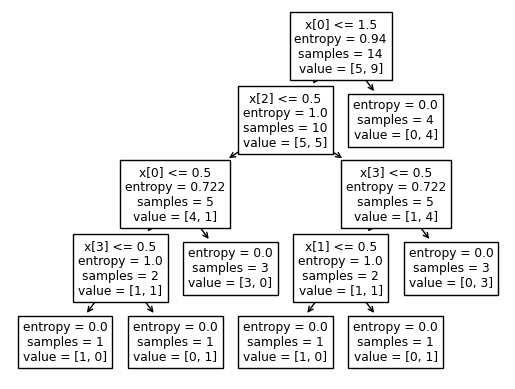

In [15]:
# Visualizar a árvore de decisão
from sklearn import tree
tree.plot_tree(arvore_risco_tenis);

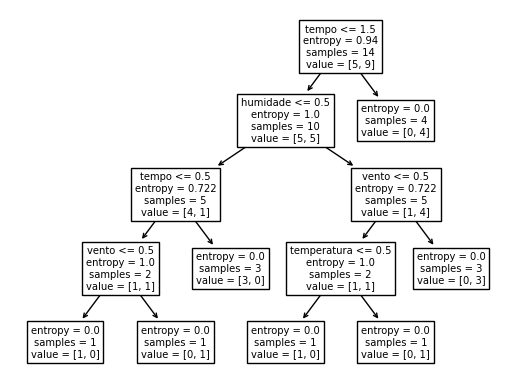

In [16]:
# Melhorar a visualização da árvore de decisão
previsores = ['tempo', 'temperatura', 'humidade', 'vento']
tree.plot_tree(arvore_risco_tenis, feature_names=previsores);

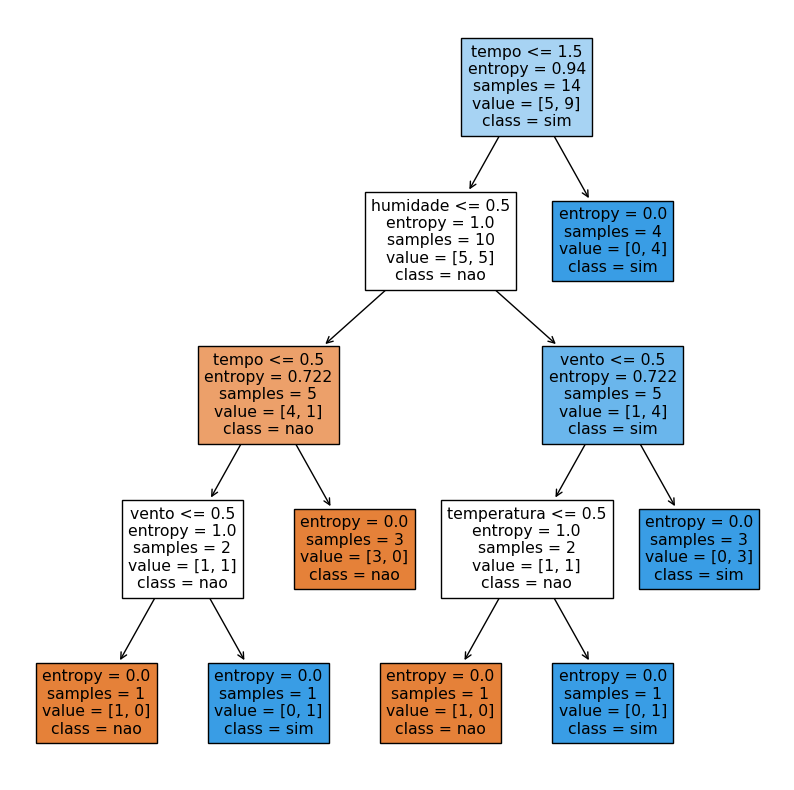

In [17]:
# Melhorar um pouco mais a visualização
import matplotlib.pyplot as plt
previsores = ['tempo', 'temperatura', 'humidade', 'vento']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_tenis, feature_names=previsores, class_names = arvore_risco_tenis.classes_, filled=True);

## Teste do modelo

In [25]:
# Registro
#Caso 1 == [Ensolarado, Moderado, Normal, Forte]
#Caso 2 == [Chuvoso, Agradável, Normal, Fraco]
#Caso 3 == [Nublado, Quente, Normal, Forte]
#Caso 4 == [Nublado, Agradável, Alta, Forte]

previsoes = arvore_risco_tenis.predict([
    [1, 1, 1, 0],
    [0, 0, 1, 1],
    [2, 2, 1, 0],
    [2, 0, 0, 0]])
#previsoes
i=1
for n in previsoes:
    print(f"Possibilidade de jogar tênis Caso {i}: {n}")
    i+=1

Possibilidade de jogar tênis Caso 1: sim
Possibilidade de jogar tênis Caso 2: sim
Possibilidade de jogar tênis Caso 3: sim
Possibilidade de jogar tênis Caso 4: sim
